# Aim to demonstrate how different model architectures can affect classification accuracy on the same data set

# Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

## Dataset

### Data standarization

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]

# Split the training data into training and validation sets
validation_split = 0.2
num_validation_samples = int(validation_split * len(x_train))
x_val, y_val = x_train[-num_validation_samples:], y_train[-num_validation_samples:]
x_train, y_train = x_train[:-num_validation_samples], y_train[:-num_validation_samples]

In [3]:
# Verifying dataset

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train)

(48000, 28, 28)
(48000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 0 1 2]


## Designing Graph for training and validation

In [4]:
def plot_training_history(history, model_name):
    # Plot training loss and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training accuracy and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Model 1

Epoch 1/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1871 - accuracy: 0.9430 - val_loss: 0.0668 - val_accuracy: 0.9818
Epoch 2/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0687 - accuracy: 0.9793 - val_loss: 0.0569 - val_accuracy: 0.9820
Epoch 3/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0565 - val_accuracy: 0.9837
Epoch 4/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0489 - val_accuracy: 0.9849
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0430 - accuracy: 0.9866
Model 1 - Test accuracy: 0.9865999817848206 Test loss: 0.04299550876021385


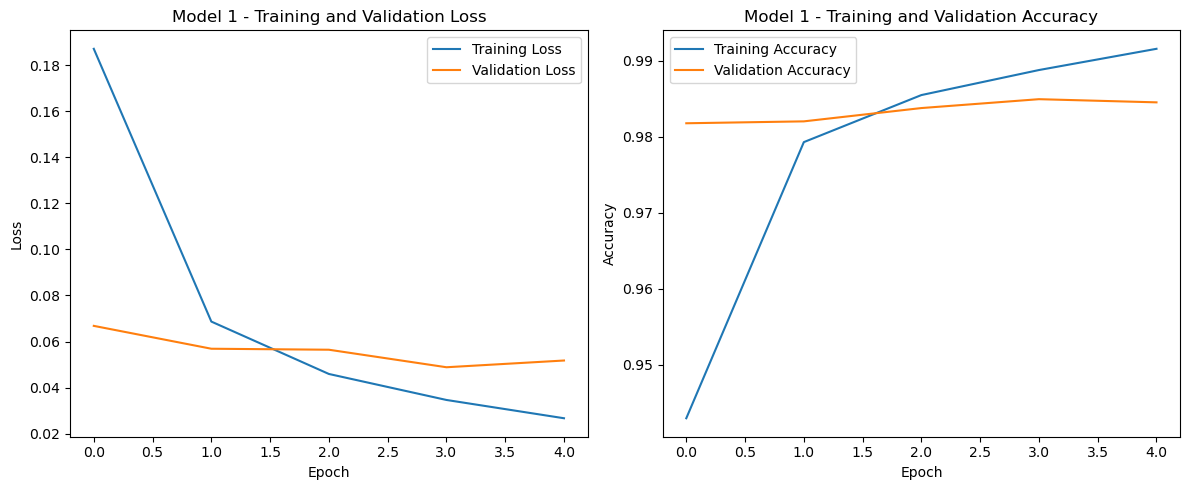

In [5]:
# Define and compile Model 1
model1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])
model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train Model 1 with validation data
history1 = model1.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

# Evaluate Model 1 on test data
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)

print(f'Model 1 - Test accuracy: {test_acc1} Test loss: {test_loss1}')
plot_training_history(history1, 'Model 1')

## Model 2

Epoch 1/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0606 - val_accuracy: 0.9847
Epoch 2/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0163 - accuracy: 0.9941 - val_loss: 0.0475 - val_accuracy: 0.9876
Epoch 3/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0589 - val_accuracy: 0.9853
Epoch 4/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0573 - val_accuracy: 0.9868
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0440 - accuracy: 0.9885
Model 2 - Test accuracy: 0.9884999990463257 Test loss: 0.04397604987025261


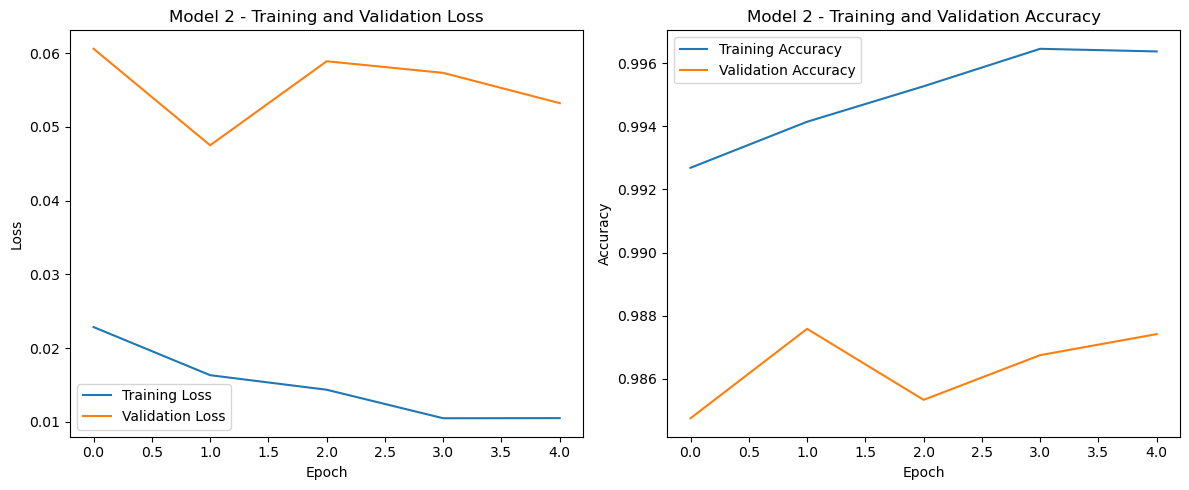

In [10]:
# Define and compile Model 2
model2_modified = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),  # Additional dense layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train Model 2 with validation data
history2 = model2.fit(x_train[..., tf.newaxis], y_train, epochs=5, validation_data=(x_val[..., tf.newaxis], y_val))

# Evaluate Model 2 on test data
test_loss2, test_acc2 = model2.evaluate(x_test[..., tf.newaxis], y_test)

print(f'Model 2 - Test accuracy: {test_acc2} Test loss: {test_loss2}')
plot_training_history(history2, 'Model 2')

## Model 3

Epoch 1/5
1500/1500 [==============================] - 125s 82ms/step - loss: 0.2012 - accuracy: 0.9364
Epoch 2/5
1500/1500 [==============================] - 119s 79ms/step - loss: 0.0659 - accuracy: 0.9794
Epoch 3/5
1500/1500 [==============================] - 120s 80ms/step - loss: 0.0489 - accuracy: 0.9853
Epoch 4/5
1500/1500 [==============================] - 119s 79ms/step - loss: 0.0357 - accuracy: 0.9892
Epoch 5/5
1500/1500 [==============================] - 857s 572ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 1/5
1500/1500 [==============================] - 122s 82ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0564 - val_accuracy: 0.9849
Epoch 2/5
1500/1500 [==============================] - 124s 82ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0433 - val_accuracy: 0.9892
Epoch 3/5
1500/1500 [==============================] - 123s 82ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0619 - val_accuracy: 0.9853
Epoch 4/5
1500/1500 [====================

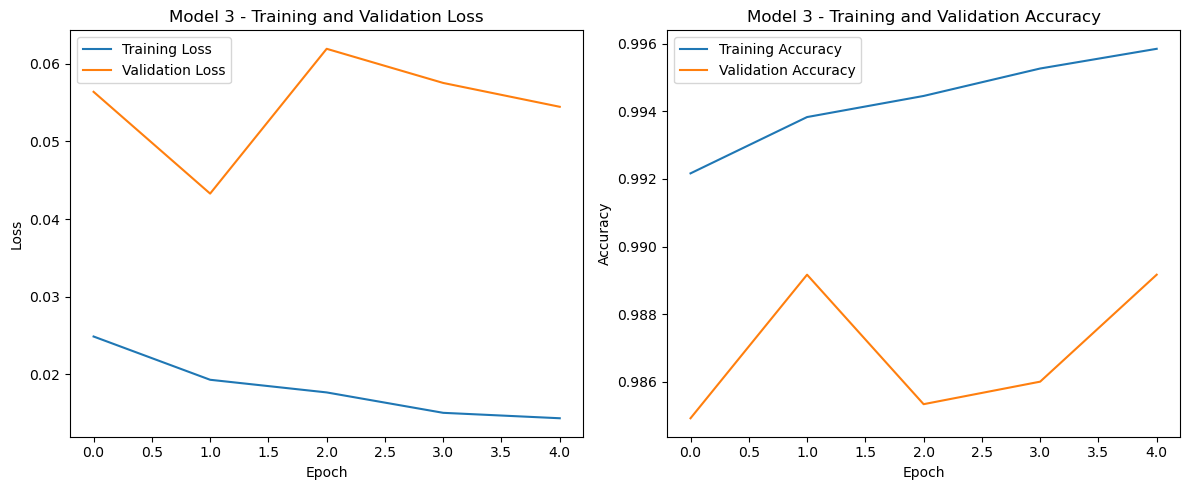

In [11]:
# Define and compile Model 3
model3 = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Additional convolutional layer
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Additional convolutional layer
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train Model 3
model3.fit(x_train[..., tf.newaxis], y_train, epochs=5)
history3 = model3.fit(x_train[..., tf.newaxis], y_train, epochs=5, validation_data=(x_val[..., tf.newaxis], y_val))
test_loss, test_acc = model3.evaluate(x_test[..., tf.newaxis], y_test)

print(f'Model 3 - Test accuracy: {test_acc} Test loss: {test_loss}')
plot_training_history(history3, 'Model 3')

## Model 4

Epoch 1/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2101 - accuracy: 0.9510 - val_loss: 0.1690 - val_accuracy: 0.9481
Epoch 2/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0579 - accuracy: 0.9834 - val_loss: 0.1015 - val_accuracy: 0.9700
Epoch 3/5
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0426 - accuracy: 0.9873 - val_loss: 0.0668 - val_accuracy: 0.9795
Epoch 4/5
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.0758 - val_accuracy: 0.9776
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0606 - accuracy: 0.9818
ResNet Model - Test accuracy: 0.9818000197410583 Test loss: 0.0605810284614563


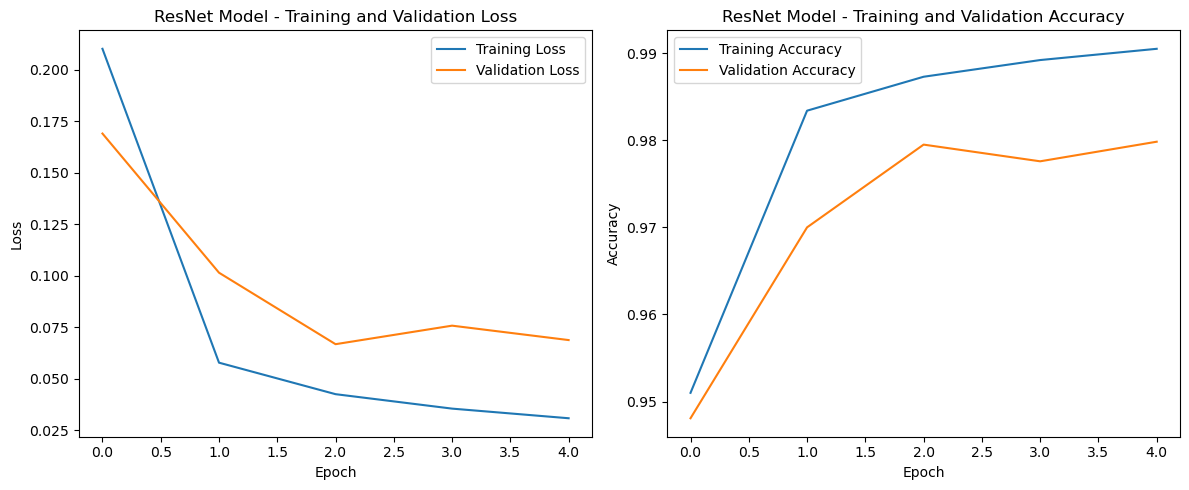

In [9]:
# Define a basic ResNet block
def resnet_block(x, filters, kernel_size=3, stride=1):
    y = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding="same")(x)
    y = layers.BatchNormalization()(y)
    y = layers.ReLU()(y)

    y = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding="same")(y)
    y = layers.BatchNormalization()(y)

    if stride > 1:
        x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding="same")(x)

    out = layers.Add()([x, y])
    out = layers.ReLU()(out)

    return out

# Define and compile ResNet Model
input = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu')(input)
x = layers.MaxPooling2D(2)(x)

# Add ResNet blocks
num_blocks = 3
for _ in range(num_blocks):
    x = resnet_block(x, 32)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(10, activation='softmax')(x)

model_resnet = keras.Model(inputs=input, outputs=x)
model_resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ResNet Model with validation data
history_resnet = model_resnet.fit(x_train[..., tf.newaxis], y_train, epochs=5, validation_data=(x_val[..., tf.newaxis], y_val))

# Evaluate ResNet Model on test data
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(x_test[..., tf.newaxis], y_test)
print(f'ResNet Model - Test accuracy: {test_acc_resnet} Test loss: {test_loss_resnet}')

# Plot training and validation performance for ResNet Model
plot_training_history(history_resnet, 'ResNet Model')